In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.impute import KNNImputer
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### This is a binary classification problem.

### The dataset’s  positive class (1) consists of component failures for a specific component of the APS system.

### The The dataset’s negative class (0) consists of trucks with failures for components not related to the APS.

### 1.	Develop strategies, incorporating basic programming skills (input / output and basic data structures) for identifying and handling missing and out-of-range data

In [2]:
df=pd.read_csv("aps_failure_set.csv")
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
df.tail(5) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [4]:
df.shape

(60000, 171)

In [5]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [7]:
unique_values = df.nunique()
unique_values

class         2
aa_000    22095
ab_000       30
ac_000     2062
ad_000     1887
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 171, dtype: int64

In [8]:
string_columns = df.select_dtypes(include=['object'])

# Loop through the selected string columns and print unique values
for column in string_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'class': ['neg' 'pos']
Unique values in column 'ab_000': ['na' '0' '2' '4' '6' '8' '18' '10' '12' '16' '204' '24' '134' '90' '26'
 '14' '34' '52' '20' '22' '30' '36' '100' '48' '58' '32' '28' '44' '46'
 '68']
Unique values in column 'ac_000': ['2130706438' '0' '228' ... '8974' '123514' '2602']
Unique values in column 'ad_000': ['280' 'na' '100' ... '5286' '3608' '194868']
Unique values in column 'ae_000': ['0' '16' '104' 'na' '2' '222' '4' '290' '1286' '170' '6' '806' '1464'
 '274' '18' '8' '342' '64' '34' '192' '144' '176' '1512' '120' '58' '114'
 '460' '12' '112' '1314' '20' '550' '36' '1424' '180' '324' '204' '254'
 '106' '154' '92' '256' '202' '352' '26' '124' '2240' '466' '778' '28'
 '100' '14' '276' '42' '82' '22' '384' '282' '386' '98' '164' '108' '86'
 '38' '266' '1056' '134' '10' '200' '150' '326' '350' '398' '424' '32'
 '128' '752' '314' '732' '2312' '400' '158' '668' '30' '212' '224' '950'
 '4726' '60' '226' '388' '640' '258' '62' '206' '44' '414' '45

Unique values in column 'ah_000': ['2551696' '1393352' '1234132' ... '56982' '2634394' '1235850']
Unique values in column 'ai_000': ['0' '14346' '3320' ... '13828' '8826' '12084']
Unique values in column 'aj_000': ['0' '68' '226' '80' '64' '58' '32' '11548' '682' '992' '302' '70' '31432'
 'na' '154' '230' '174' '42' '36' '60' '124' '86' '110' '106' '16650' '92'
 '468' '50' '2542' '122' '562' '46' '402' '24' '38' '26' '196' '42544'
 '2782' '40' '326' '62' '198' '28' '56' '108' '126' '426786' '164' '240'
 '216' '88' '84' '4' '48' '252' '286' '278' '420' '12830' '144' '180'
 '100' '66' '186' '134' '150' '78' '132' '204' '370' '44' '168' '208'
 '210' '8832' '102' '8' '4714' '94' '2206' '774' '34' '140' '318' '74'
 '104' '146' '260' '90' '270' '96' '316' '294' '195754' '224' '170' '12'
 '444' '242' '334' '18' '284' '16' '176' '156' '436' '54' '76' '292' '972'
 '274' '412' '200' '184' '136' '52' '118' '14' '128' '400' '232' '190'
 '72' '178' '324' '328' '27384' '82' '1734' '5030' '182' '152'

Unique values in column 'ay_000': ['0' '2273870' 'na' '32604' '1769754' '31400' '30362' '31610' '37826'
 '190622' '28530' '29010' '31804' '36508' '30260' '25542' '36276' '31132'
 '31414' '66298' '36720' '25852' '34014' '29264' '8266008' '32730' '26762'
 '25034' '2547492' '2' '32330' '145724' '25500' '38180' '915090' '3108720'
 '26122' '28492' '35602' '30406' '38906' '38918' '28' '27198' '40122'
 '34092' '35710' '33606' '27784' '31670' '26268' '40552' '37514' '2724844'
 '31838' '4013830' '26442' '36800' '53224' '30824' '1014962' '35654'
 '28374' '35566' '33434' '34332' '24420' '36262' '162344' '351560' '24176'
 '1186980' '27924' '533476' '25592' '26904' '40318' '29705862' '17791214'
 '30266' '184' '48162' '1400696' '11402778' '4181384' '56984' '23547578'
 '30934' '288166' '28722' '36498' '30850' '66464' '281840' '39070' '25270'
 '34930' '31330' '32972' '1522468' '32006' '31574' '12824760' '28998'
 '3525444' '29648' '28246' '35618' '40996' '36540' '30574' '35736' '38054'
 '32332' '56' '2

Unique values in column 'az_009': ['0' '2' '4' 'na' '28' '952' '10' '666148' '1532' '18' '26' '1118' '320'
 '14' '24' '20' '914' '44' '34' '1056' '6' '3612' '72' '2084' '1290' '8'
 '40' '256294' '1174' '1442' '1098' '36' '82' '42' '1130' '1002' '25174'
 '1372' '1036' '2064' '370' '114' '1448' '16' '22' '312' '1466' '5654'
 '1332' '12' '86' '1148' '54' '1254' '62' '38' '1670' '146' '2802' '1178'
 '3796' '1200' '1194' '1894' '70' '996' '68' '1092' '30' '5050' '252' '64'
 '1494' '1736' '78' '104' '116' '24814' '148' '1266' '2974' '16774' '2058'
 '1170' '988' '1026' '1152' '2852' '1328' '1172' '1232' '80' '134' '902'
 '32' '854' '12178' '504' '1078' '37782' '400' '9688' '750' '428' '106'
 '1124' '240' '92' '1214' '1224' '1388' '1208' '380' '66' '76' '396'
 '1244' '94' '1346' '144' '1678' '724' '410' '328' '12852' '1298' '6750'
 '164' '692' '170' '1260' '5952' '98' '15678' '2278' '802' '632' '948'
 '506' '260' '52' '1220' '1348' '1308' '1168' '1658' '2596' '90' '1350'
 '1042' '1548' '120' '

Unique values in column 'cj_000': ['0' '5602235.52' '3987438.72' ... '2831745.6' '25016.64' '106006.08']
Unique values in column 'ck_000': ['916567.68' '643536.96' '236099.52' ... '1529548.8' '1048805.76'
 '389530.56']
Unique values in column 'cl_000': ['6' '0' '2' '142' 'na' '10' '4' '36' '26' '144' '150' '52' '32' '80' '14'
 '128' '48' '20' '38' '8' '12' '18944' '64' '1086' '18' '882' '680' '72'
 '662' '86' '84' '58' '1130' '22' '98304' '50' '46' '24576' '298' '28'
 '56' '184' '340' '30' '724' '374' '654' '82' '16' '314' '158' '126' '40'
 '320' '76' '70' '4100' '118' '90' '7168' '172' '152' '54' '55296' '162'
 '2108' '420' '1216' '218' '446' '136' '44' '250' '24' '574' '130' '2834'
 '182' '196' '590' '198' '774' '792' '100' '634' '146' '94' '6144' '992'
 '114' '302' '432' '14336' '784' '2198' '42' '89600' '88064' '62' '110'
 '1076' '53248' '3422' '106' '576' '34' '214' '9216' '752' '902' '8704'
 '78' '3224' '548' '24050' '88' '424' '56320' '714' '200' '48128' '850'
 '132' '1664' '506

Unique values in column 'cs_000': ['10476' '6160' '3584' ... '38982' '92088' '9898']
Unique values in column 'cs_001': ['1226' '796' '500' ... '9422' '8166' '11160']
Unique values in column 'cs_002': ['267998' '164860' '56362' ... '48640' '333922' '81228']
Unique values in column 'cs_003': ['521832' '350066' '149726' ... '9664' '700650' '195104']
Unique values in column 'cs_004': ['428776' '272956' '100326' ... '425276' '388092' '284388']
Unique values in column 'cs_005': ['4015854' '1837600' '1744838' ... '40190' '3174954' '2064878']
Unique values in column 'cs_006': ['895240' '301242' '488302' ... '75776' '1312814' '233308']
Unique values in column 'cs_007': ['26330' '9148' '16682' ... '38298' '24104' '36428']
Unique values in column 'cs_008': ['118' '22' '246' '0' '204' '86' '352' '170' '96' '342' '384' '2' '104'
 '40' '50' '280' '168' '16' '234' '14' '68' '188' '48' '940' '4' '78'
 '1056' '24' '32' '80' '76' '20' '214' '26' '164' '44' '190' 'na' '30'
 '296' '150' '132' '176' '370' 

Unique values in column 'dr_000': ['0' '370' '796' ... '893020' '2592' '3774']
Unique values in column 'ds_000': ['202710' '103330' '65772' ... '132418' '265640' '79872']
Unique values in column 'dt_000': ['37928' '16254' '10534' ... '19410' '34814' '54496']
Unique values in column 'du_000': ['14745580' '4510080' '300240' ... '470800' '823720' '25232340']
Unique values in column 'dv_000': ['1876644' '868538' '48028' ... '82346' '5648346' '17080']
Unique values in column 'dx_000': ['0' '20174' '98334' ... '165674' '59198' '44500']
Unique values in column 'dy_000': ['0' '44' '27588' ... '13964' '6350' '16050']
Unique values in column 'dz_000': ['0' 'na' '42' '2' '8' '12' '4' '14' '52' '78' '6' '348' '162' '16' '32'
 '62' '64' '10' '34' '112' '182' '22' '514' '324' '512' '48' '44' '178'
 '20' '1212' '274' '154' '104' '1414' '106' '38' '30' '92' '122' '36' '28'
 '904' '136' '18' '276' '428' '940' '118']
Unique values in column 'ea_000': ['0' 'na' '48' '30' '32' '74' '6' '2' '4' '14' '18' '

In [9]:
df2 = df.replace(['na'],[np.NaN])

In [10]:
columns_changing = df2.columns[1:]

#Change the data type of the selected columns
df2[columns_changing] = df2[columns_changing].astype('float')

In [11]:
column_dtypes = df2.dtypes

# Print the data types
print(column_dtypes)

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [12]:
df3 = df2.drop_duplicates()

In [13]:
unique_values = df3.nunique()
print(unique_values)

class         2
aa_000    22095
ab_000       29
ac_000     2061
ad_000     1886
          ...  
ee_007    30469
ee_008    24213
ee_009     9724
ef_000       28
eg_000       49
Length: 171, dtype: int64


In [14]:
df3.shape

(60000, 171)

In [15]:
df3.count()

class     60000
aa_000    60000
ab_000    13671
ac_000    56665
ad_000    45139
          ...  
ee_007    59329
ee_008    59329
ee_009    59329
ef_000    57276
eg_000    57277
Length: 171, dtype: int64

In [16]:
df3.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [17]:
df3.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [18]:
df3.isnull().any().head(5)

class     False
aa_000    False
ab_000     True
ac_000     True
ad_000     True
dtype: bool

In [19]:
df3.isnull().any().tail(5)

ee_007    True
ee_008    True
ee_009    True
ef_000    True
eg_000    True
dtype: bool

In [20]:
string_columns = df3.select_dtypes(include=['float64'])

# Loop through the selected string columns and print unique values
for column in string_columns:
    unique_values = df3[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'aa_000': [ 76698.  33058.  41040. ...  83818.  16978. 153002.]
Unique values in column 'ab_000': [ nan   0.   2.   4.   6.   8.  18.  10.  12.  16. 204.  24. 134.  90.
  26.  14.  34.  52.  20.  22.  30.  36. 100.  48.  58.  32.  28.  44.
  46.  68.]
Unique values in column 'ac_000': [2.13070644e+09 0.00000000e+00 2.28000000e+02 ... 8.97400000e+03
 1.23514000e+05 2.60200000e+03]
Unique values in column 'ad_000': [2.80000e+02         nan 1.00000e+02 ... 5.28600e+03 3.60800e+03
 1.94868e+05]
Unique values in column 'ae_000': [0.0000e+00 1.6000e+01 1.0400e+02        nan 2.0000e+00 2.2200e+02
 4.0000e+00 2.9000e+02 1.2860e+03 1.7000e+02 6.0000e+00 8.0600e+02
 1.4640e+03 2.7400e+02 1.8000e+01 8.0000e+00 3.4200e+02 6.4000e+01
 3.4000e+01 1.9200e+02 1.4400e+02 1.7600e+02 1.5120e+03 1.2000e+02
 5.8000e+01 1.1400e+02 4.6000e+02 1.2000e+01 1.1200e+02 1.3140e+03
 2.0000e+01 5.5000e+02 3.6000e+01 1.4240e+03 1.8000e+02 3.2400e+02
 2.0400e+02 2.5400e+02 1.0600e+02 1.5400e+02

Unique values in column 'bd_000': [1.0000e+01 4.5400e+02 2.0200e+02 ... 2.4044e+04 3.3560e+03 3.0900e+03]
Unique values in column 'be_000': [  108.   364.   576. ... 14356.  5002. 10334.]
Unique values in column 'bf_000': [  50.  350.    4. ... 1276. 2254. 1016.]
Unique values in column 'bg_000': [2551696. 1393352. 1234132. ...   56982. 2634394. 1235850.]
Unique values in column 'bh_000': [ 97518.  49028.  28804. ...  41812. 129760. 105862.]
Unique values in column 'bi_000': [947550. 688314. 160176. ...  14404. 580084. 310028.]
Unique values in column 'bj_000': [ 799478.  392208.  139730. ...  678792. 1032454.  260378.]
Unique values in column 'bk_000': [330760. 341420. 137160. ... 313640. 286840. 302700.]
Unique values in column 'bl_000': [353400. 359780. 130640. ... 103720. 201640. 332300.]
Unique values in column 'bm_000': [299160. 366560.     nan ... 110600. 268140. 308960.]
Unique values in column 'bn_000': [305200.     nan 214900. ... 203980. 245580. 282140.]
Unique values in col

Unique values in column 'cx_000': [51288.    nan 29188. ... 23486. 66850.  9240.]
Unique values in column 'cy_000': [0.00000e+00         nan 2.20000e+01 2.40000e+01 3.20000e+01 1.84000e+02
 2.00000e+00 8.20000e+01 8.40000e+01 1.48000e+02 3.40000e+01 3.24000e+02
 3.80000e+01 2.82000e+02 1.00000e+01 4.60000e+01 4.20000e+01 3.90000e+02
 9.00000e+01 1.46600e+03 2.80000e+01 1.20000e+01 5.40000e+01 2.00000e+02
 3.08000e+02 6.66000e+02 6.92000e+02 5.80000e+01 1.64000e+02 1.46000e+02
 4.14000e+02 2.00000e+01 5.20000e+01 2.60000e+01 1.40000e+01 4.74400e+03
 9.20000e+01 5.50080e+05 5.08000e+02 3.60000e+01 3.00000e+01 1.80000e+01
 8.00000e+01 7.40000e+01 3.14600e+03 1.20000e+03 5.00000e+01 3.62600e+03
 6.60000e+01 9.26000e+02 6.40000e+01 1.08000e+02 2.62000e+02 1.67600e+03
 4.00000e+01 1.18000e+02 1.82000e+02 4.80000e+01 7.20000e+01 6.00000e+01
 7.00000e+01 1.02000e+02 5.12800e+03 4.40000e+01 1.52000e+02 3.92380e+04
 2.98000e+02 1.06000e+02 8.00000e+02 8.18000e+02 2.13000e+03 1.10000e+02
 4.96000

In [21]:
df3.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [22]:
df3=df3.rename(columns={"class": "classification"})

In [23]:
df3['classification'].value_counts()

neg    59000
pos     1000
Name: classification, dtype: int64

In [24]:
df3['classification'] = df3.classification.map({'neg':0, 'pos':1})

In [25]:
df3['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [26]:
df3.describe(include='all')

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### Step 1

In [27]:
# Columns where missing values are more than 70% -> 60000x0.7=42000
# Dropping all the columns where the number of missing values are more than 42K

In [28]:
df3.isnull().sum().nlargest(10)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
dtype: int64

In [29]:
#df5=df3.dropna(axis = 1, thresh=42000,inplace= True)
df4 = df3.dropna(axis=1, thresh=(len(df3) - 42000))

In [30]:
df4.head()

,classification,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [31]:
df3.shape

(60000, 171)

In [32]:
df4.shape

(60000, 164)

In [33]:
df4.isnull().sum().nlargest(10)

bm_000    39549
bl_000    27277
bk_000    23034
ad_000    14861
cf_000    14861
cg_000    14861
ch_000    14861
co_000    14861
ct_000    13808
cu_000    13808
dtype: int64

### Step 2

In [34]:
df5 = df4.select_dtypes(include=['float64'])
medians = df4.median()
#df4=df4.fillna(medians, inplace=True)
df5=df5.fillna(medians)

In [35]:
df5.head(5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [36]:
df5['classification']=df3['classification']

In [37]:
df5

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,classification
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0,0
59996,2286.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0,0
59997,112.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0,0
59998,80292.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0,0


In [38]:
print("Percentage of Scania trucks with failures for components not related to the APS \n", (df5[df5['classification']== 0].shape[0] / df5.shape[0]) * 100)
print("Percentage of Scania trucks with failures for components related to the APS \n", (df5[df5['classification']== 1].shape[0] / df5.shape[0]) * 100)

Percentage of Scania trucks with failures for components not related to the APS 
 98.33333333333333
Percentage of Scania trucks with failures for components related to the APS 
 1.6666666666666667


### 2.	Programmatically implement graphical methods to identify issues within a data set (missing, out of range, dirty data)

In [39]:
df3.describe()

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


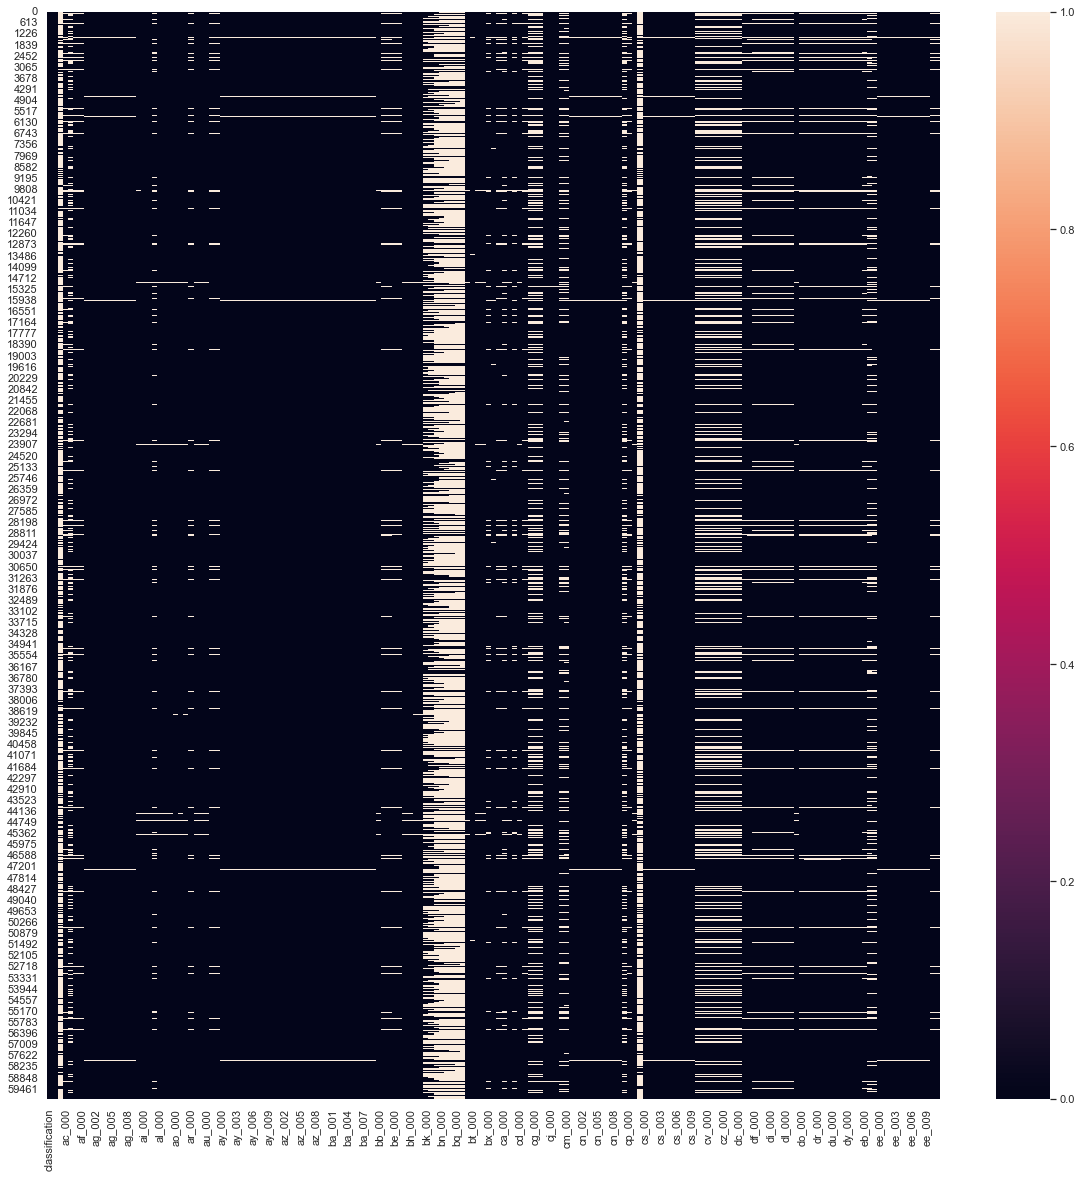

In [40]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df3.isnull())
plt.show(plot)

### Columns where missing values are more than 70% -> 60000x0.7=42000

<AxesSubplot:>

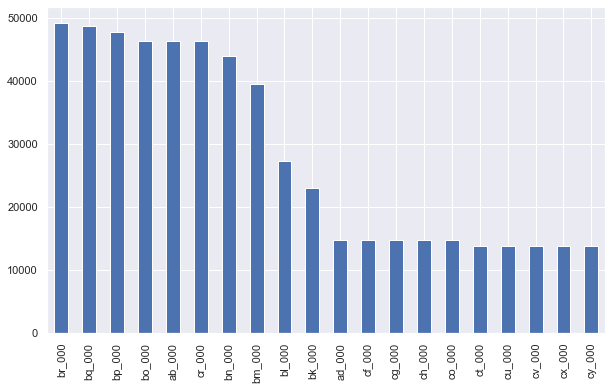

In [41]:
df3.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [42]:
#outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

aa_000    47834.0
dtype: float64


In [43]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\eduma\AppData\Local\Temp/ipykernel_19396/1410920915.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


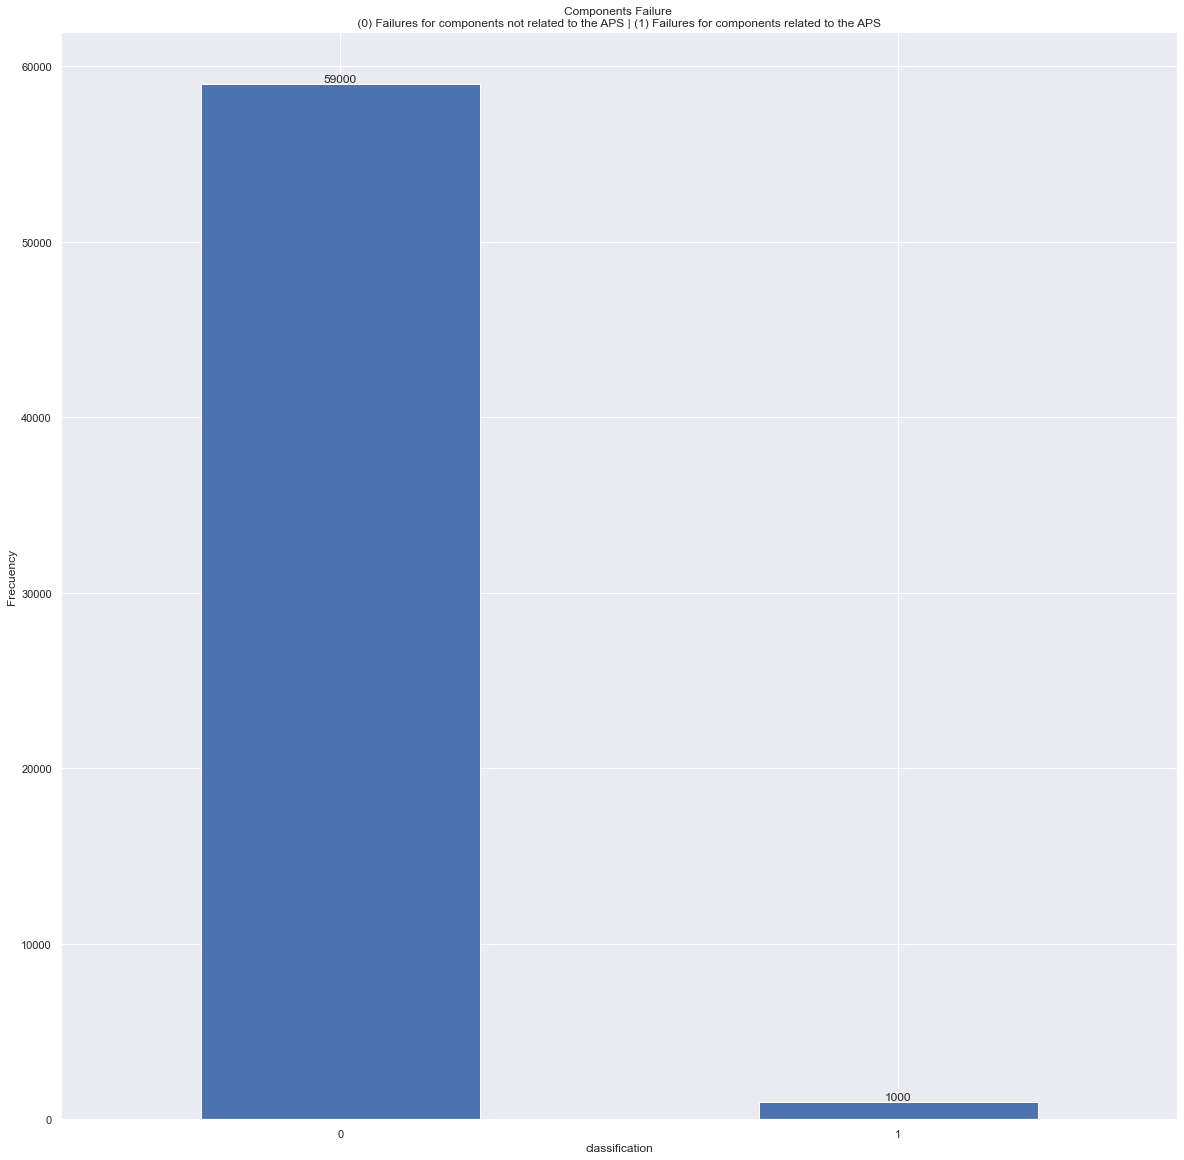

In [44]:
Count = pd.value_counts(df5['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

### 3.	Perform a critical analysis of a data set to optimise the data for a given problem space. Document the rationale behind the decisions to peers and stakeholders.

In [45]:
scaler = MinMaxScaler()

# Fit and transform the numerical data
df5[df5.columns] = scaler.fit_transform(df5)

In [46]:
df5.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,classification
0,0.027925,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,...,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,...,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,...,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,...,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,...,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000,0.0


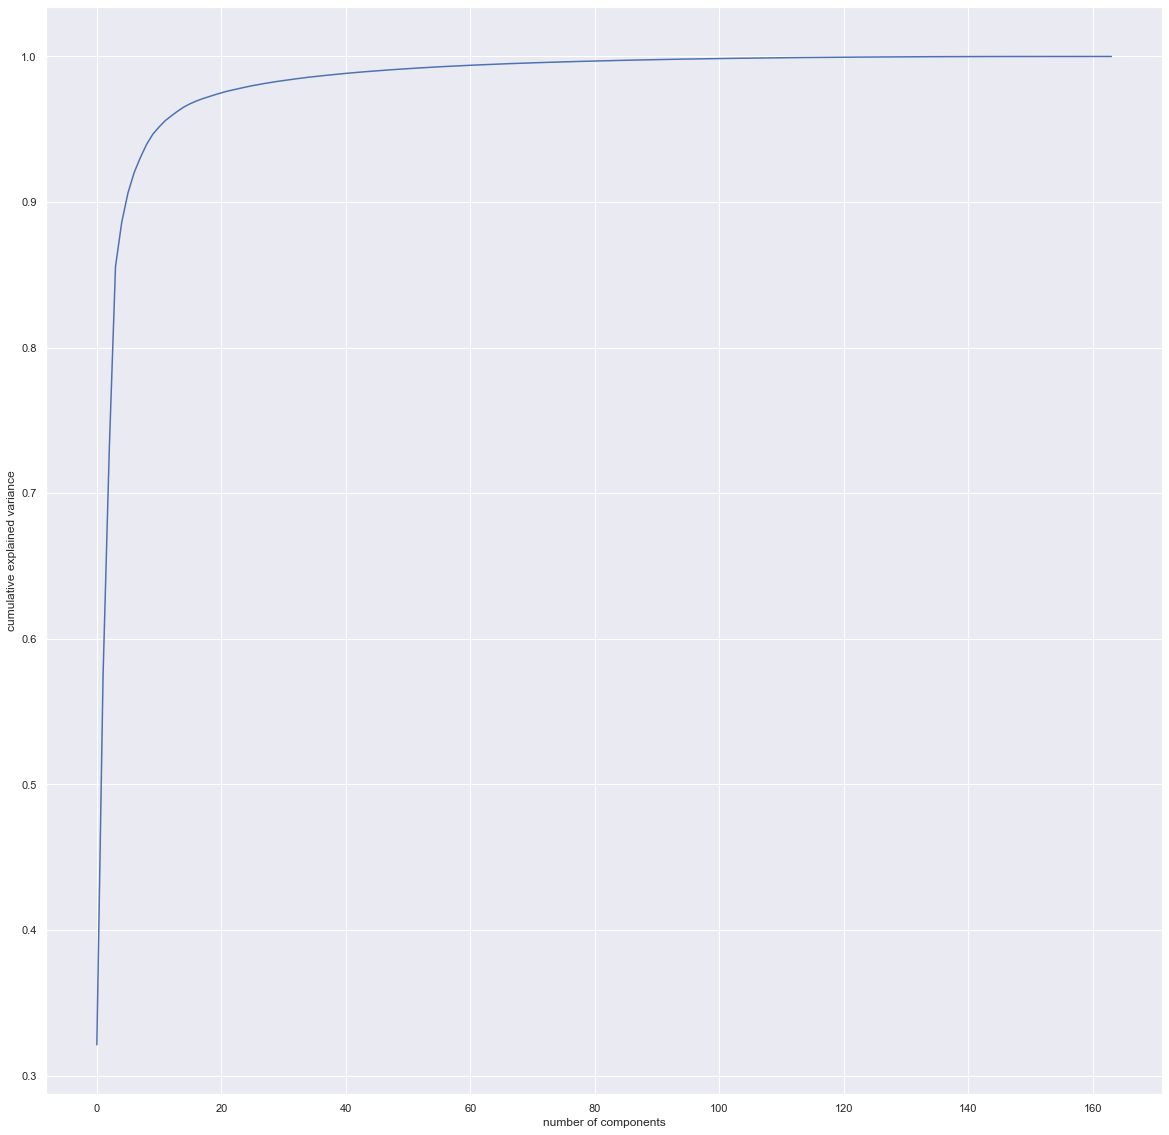

In [47]:
df5_no_label = df5.drop(df5["classification"])
pca = PCA().fit(df5_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [48]:
pca = PCA(50)
projected = pca.fit_transform(df5_no_label)

In [49]:
projected.shape

(59998, 50)

In [50]:
df5_pca= pd.DataFrame(projected)

df5_pca["classification"] = df4["classification"]

In [51]:
df5_pca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,classification
0,-0.205345,-0.097024,-0.171187,-0.009731,0.004589,0.009938,-0.043641,-0.001436,-0.008821,0.002897,...,-0.000992,-0.000222,-0.000147,-0.002811,-0.002583,-0.000016,-0.002118,0.001589,-0.000328,0
1,-0.468957,-0.076199,-0.104651,-0.032482,-0.001288,-0.010585,-0.008503,0.003157,0.007950,-0.001685,...,-0.000073,0.000689,0.000701,0.001631,-0.001374,-0.000003,0.001124,-0.002587,0.002077,0
2,0.271882,-0.186908,-0.023089,-0.064689,-0.018570,0.007944,0.059597,-0.008647,-0.022495,-0.010026,...,-0.002358,-0.001001,-0.005008,-0.006261,0.003479,-0.000105,-0.000848,0.001742,0.001520,0
3,0.011139,0.841942,0.111004,0.067454,-0.012402,0.006684,-0.025481,-0.004101,-0.015090,-0.009224,...,-0.001152,0.004957,-0.000093,0.000347,-0.002721,0.000177,0.003287,0.002315,-0.000636,0
4,-0.476466,-0.075402,-0.104754,-0.029392,0.001251,-0.008646,-0.009290,-0.002634,0.005979,0.005870,...,0.001046,-0.002513,-0.000460,0.000311,-0.000127,-0.000223,-0.000692,0.000374,0.000098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59993,0.857633,-0.252382,-0.086157,-0.014860,-0.010908,0.049632,0.062561,0.018478,-0.059026,-0.030488,...,-0.009085,0.013405,0.003045,0.001865,0.000465,0.003232,-0.005139,0.011695,0.000850,0
59994,-0.200893,0.869910,0.117193,0.036836,-0.011092,-0.015693,-0.012862,0.003082,0.017093,0.001677,...,-0.001808,-0.000158,0.000768,-0.001090,0.000774,0.000110,-0.000455,-0.001889,-0.000792,0
59995,-0.320151,0.882870,0.117758,0.059292,-0.013573,-0.013374,-0.015450,0.002641,0.016108,0.000937,...,-0.001878,-0.000476,0.000754,-0.000866,0.000569,0.000203,-0.000874,-0.001732,-0.000851,0
59996,-0.254813,0.831306,0.241689,0.224600,-0.031993,0.059343,-0.003725,0.011039,-0.067260,-0.037086,...,-0.006661,0.004451,-0.009962,-0.010385,0.005805,-0.001107,-0.004130,0.011256,0.010944,0


In [52]:
df5_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,classification
0,-0.205345,-0.097024,-0.171187,-0.009731,0.004589,0.009938,-0.043641,-0.001436,-0.008821,0.002897,...,-0.000992,-0.000222,-0.000147,-0.002811,-0.002583,-0.000016,-0.002118,0.001589,-0.000328,0
1,-0.468957,-0.076199,-0.104651,-0.032482,-0.001288,-0.010585,-0.008503,0.003157,0.007950,-0.001685,...,-0.000073,0.000689,0.000701,0.001631,-0.001374,-0.000003,0.001124,-0.002587,0.002077,0
2,0.271882,-0.186908,-0.023089,-0.064689,-0.018570,0.007944,0.059597,-0.008647,-0.022495,-0.010026,...,-0.002358,-0.001001,-0.005008,-0.006261,0.003479,-0.000105,-0.000848,0.001742,0.001520,0
3,0.011139,0.841942,0.111004,0.067454,-0.012402,0.006684,-0.025481,-0.004101,-0.015090,-0.009224,...,-0.001152,0.004957,-0.000093,0.000347,-0.002721,0.000177,0.003287,0.002315,-0.000636,0
4,-0.476466,-0.075402,-0.104754,-0.029392,0.001251,-0.008646,-0.009290,-0.002634,0.005979,0.005870,...,0.001046,-0.002513,-0.000460,0.000311,-0.000127,-0.000223,-0.000692,0.000374,0.000098,0


In [53]:
df5_array = df5_pca.values

In [54]:
X = df5_array[:,0:50]
y = df5_array[:,50]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [55]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [56]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983395 (0.000094)
LDA: 0.982603 (0.000520)
KNN: 0.983374 (0.000083)
CART: 0.960873 (0.001609)
NB: 0.944435 (0.008281)
SVM: 0.983395 (0.000094)


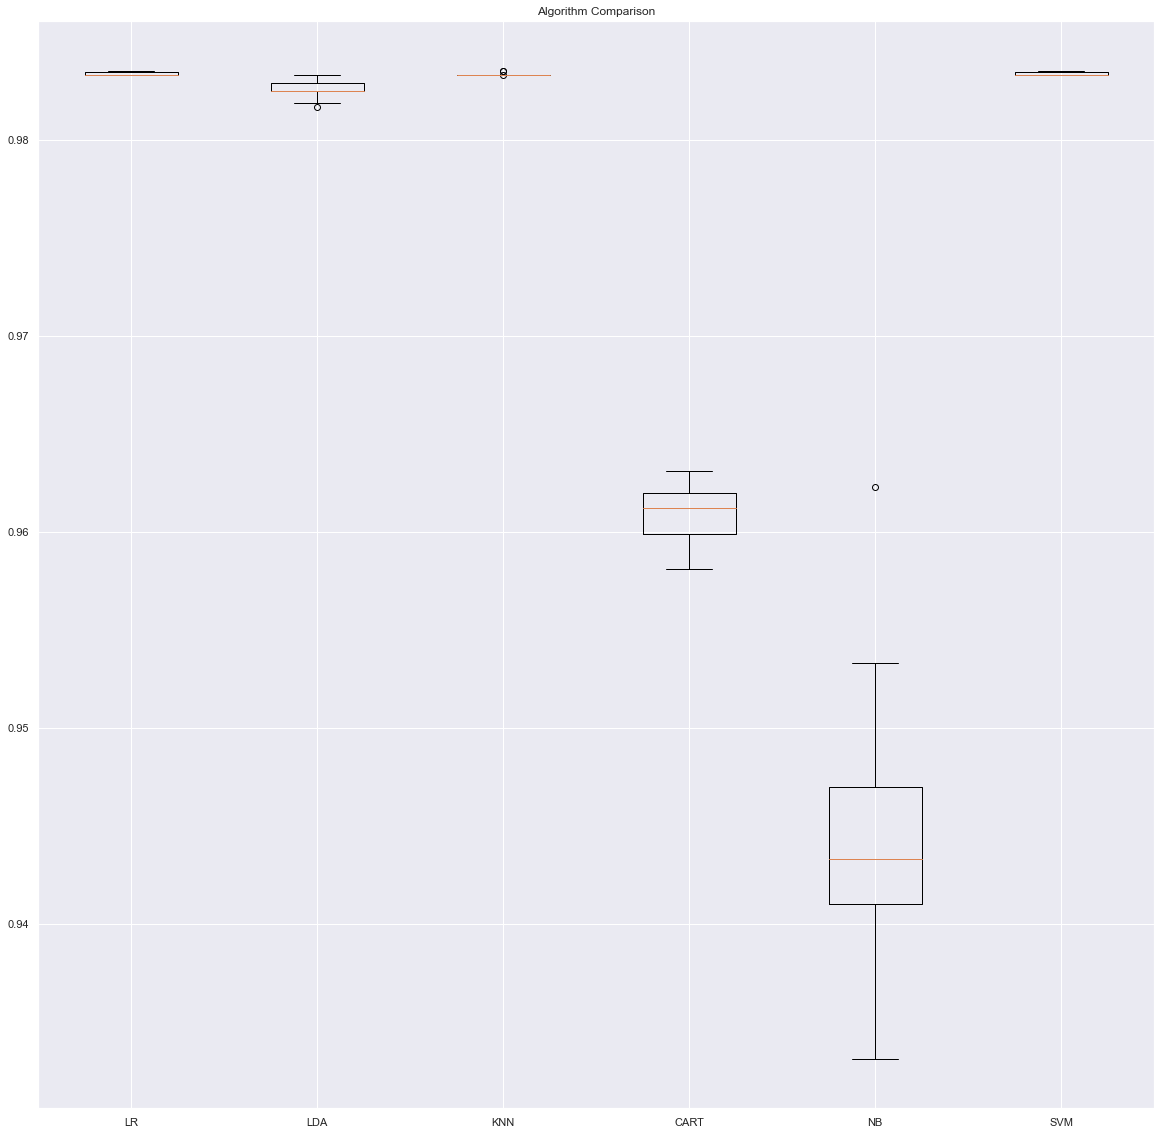

In [57]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [58]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [59]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9830833333333333
[[11797     0]
 [  203     0]]


In [60]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [61]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9824166666666667
[[11789     8]
 [  203     0]]


## Minimum Requirements

### Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean. 

### Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.

### Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. 

### Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.  

### References

### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### https://seaborn.pydata.org/generated/seaborn.heatmap.html

### https://www.statology.org/pandas-unique-values-in-column/

### https://github.com/mrunal46/APS-Failure-at-Scania-Trucks/blob/master/APS%20failure.ipynb

### https://medium.com/analytics-vidhya/aps-failure-at-scania-trucks-data-set-1eb97b12812

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

### https://www.statology.org/pandas-unique-values-in-column/

### https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

### https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

### https://scikit-learn.org/stable/modules/cross_validation.html

### https://towardsdatascience.com/missing-value-imputation-with-python-and-k-nearest-neighbors-308e7abd273d

### https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb#:~:text=np.-,nan%20is%20not%20comparable%20to%20np.,directly.&text=yes%2C%20if%20a%20data%20is,to%20use%20NaN%20%3D%3Dnp.

### https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.dropna.html